## Video4: 41586_2019_1429_MOESM5_ESM.mov 
- hFwe1(GFP)-hFwe2(RFP) 
- 0:10-26:18hr

High-resolution live cell imaging (24 hr) depicts the elimination of cells carrying hFwe1-IRES-RFP when co-cultured with cells expressing hFwe2-IRES-GFP, n=3 biologically independent experiments with similar results.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
import flowermodel.find_blobs as fb
from tqdm import tqdm
import ipywidgets as widgets
from flowermodel import plotting  
import pandas as pd
import glob


# The following files were downloaded from 
# https://doi.org/10.1038/s41586-019-1429-3

# 41586_2019_1429_MOESM2_ESM.mov hFweX(GFP/RFP) 0-24.024hr
# 41586_2019_1429_MOESM3_ESM.mov hFwe1(GFP)-hFwe1(RFP) 0-23.707hr
# 41586_2019_1429_MOESM4_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0-23.707hr
# 41586_2019_1429_MOESM5_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0:10-26:18hr
# 41586_2019_1429_MOESM8_ESM.mov Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP) 0-24.09hr 
# 41586_2019_1429_MOESM9_ESM.mov hFweX(GFP)-hFweKO(RFP) 0-24.009?hr

In [2]:
!flowermodel framecount --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM5_ESM.mov

262


In [38]:
%%bash
idx=5
flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM${idx}_ESM.mov --jobname blob${idx}

qsub blob${idx}.pbs

10553233[].helix-master


In [40]:
import pandas as pd
import glob
moviefile = '41586_2019_1429_MOESM5_ESM.mov'
files = glob.glob('../data/blobs/{:s}/blob*.csv'.format(moviefile))
blobs = [pd.read_csv(file) for file in files]
blobs = pd.concat(blobs).sort_values(['frame', 'color', 'x', 'y']).reset_index(drop=True)

blobs.to_csv('../data/blobs/{:s}.blob.csv'.format(moviefile), index=False)

In [3]:
moviefile = '41586_2019_1429_MOESM5_ESM.mov'
blobs = pd.read_csv('../data/blobs/{:s}.blob.csv'.format(moviefile))

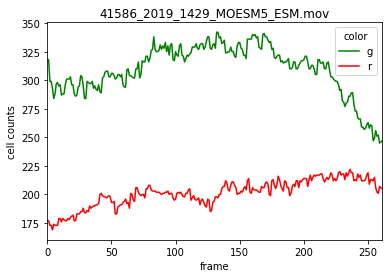

In [4]:
blobcounts = blobs.groupby(['frame', 'color']).size().unstack()
blobcounts.plot(color=blobcounts.columns.tolist())
plt.ylabel('cell counts');
plt.title(moviefile);

In [68]:
filename = '../data/movies/{:s}'.format(moviefile)
vid = imageio.get_reader(filename,  'ffmpeg')

def f(img_idx):
    plotting.plot_blob_overlay(vid, img_idx, blobs);

interactive_plot = widgets.interactive(f, img_idx=widgets.IntSlider(
    min=0, max=vid.count_frames()-1, continuous_update=False))

output = interactive_plot.children[-1]
output.layout.height = '550px'
output.layout.width = '550px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='img_idx', max=261), Output(layo…

In [44]:
import flowermodel.calculate_rdf as crdf 
data_path = '/projects/chuang-lab/jnh/flower/data'
rdfobj = crdf.vidrdf(data_path, moviefile)

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdfdf = rdfobj.get_rdf(color1, color2)

100%|██████████| 262/262 [01:53<00:00,  2.31it/s]


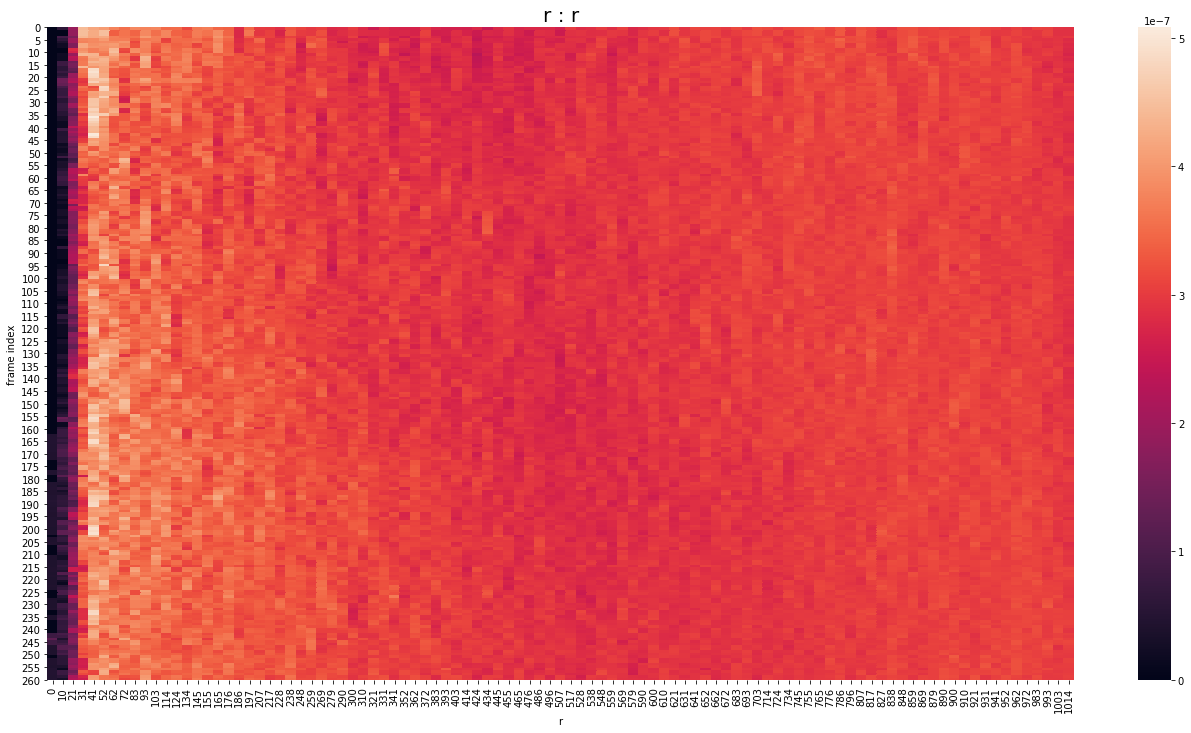

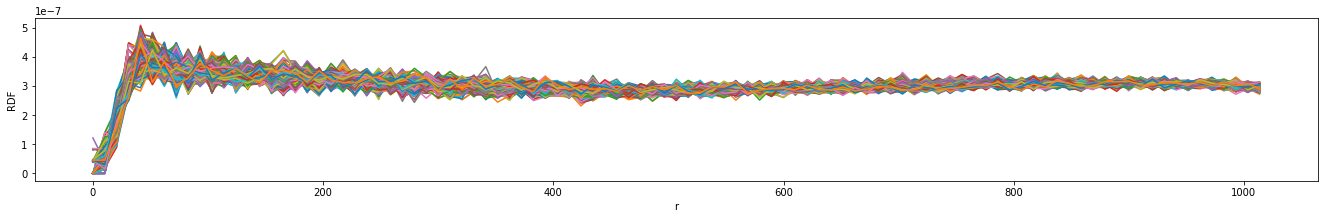

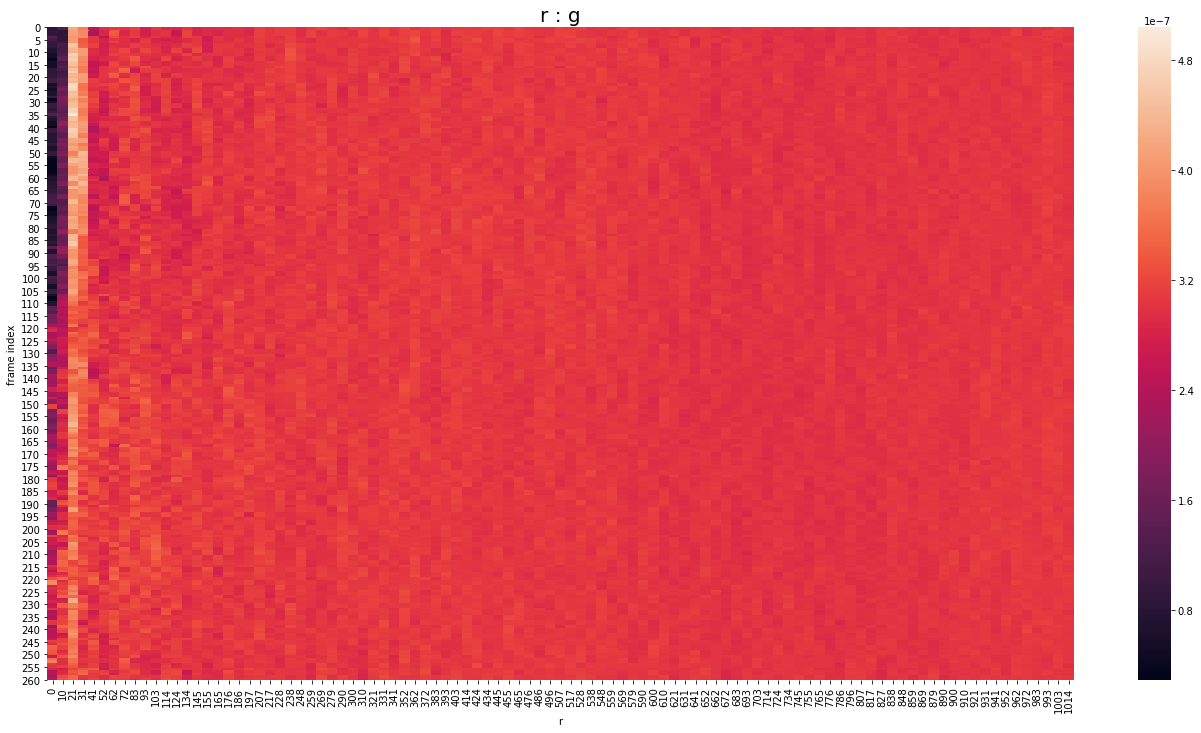

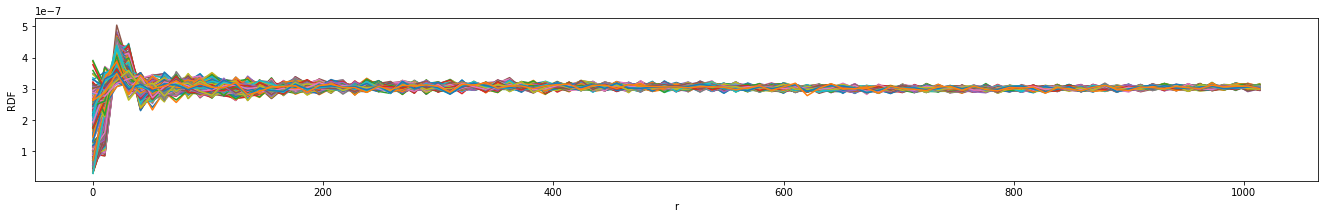

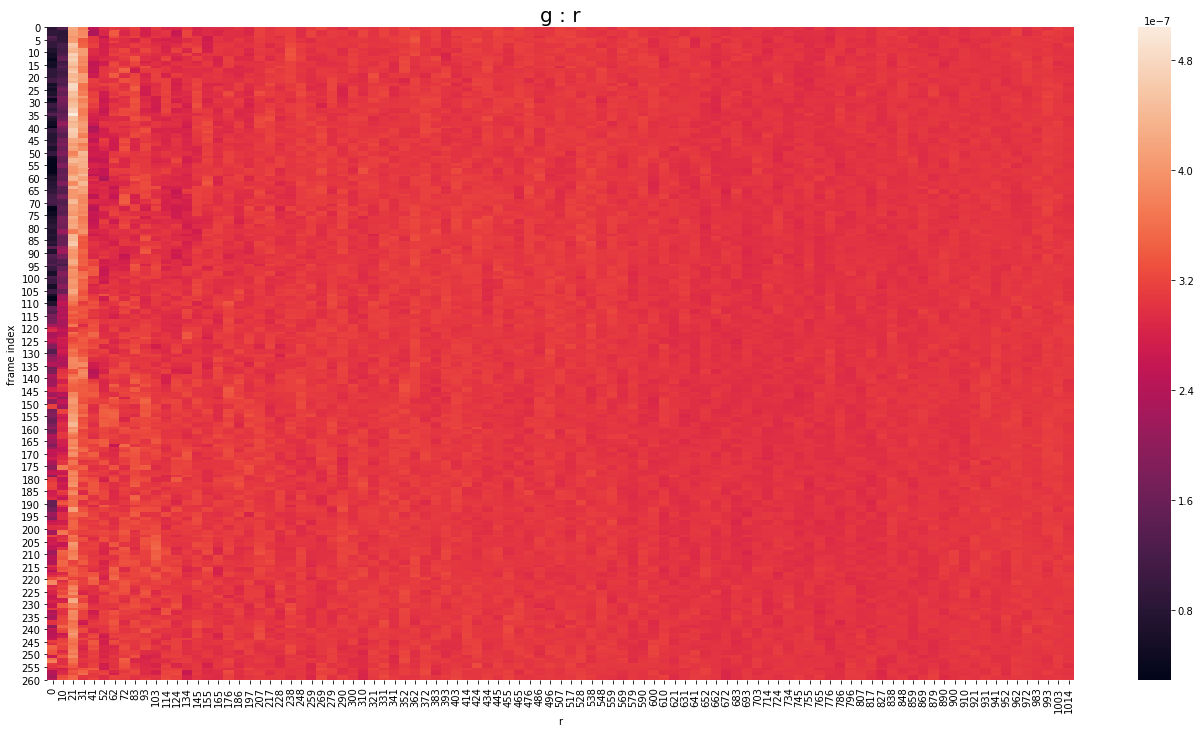

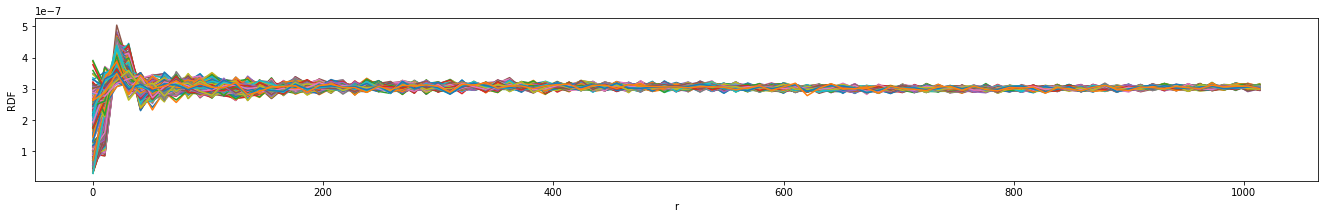

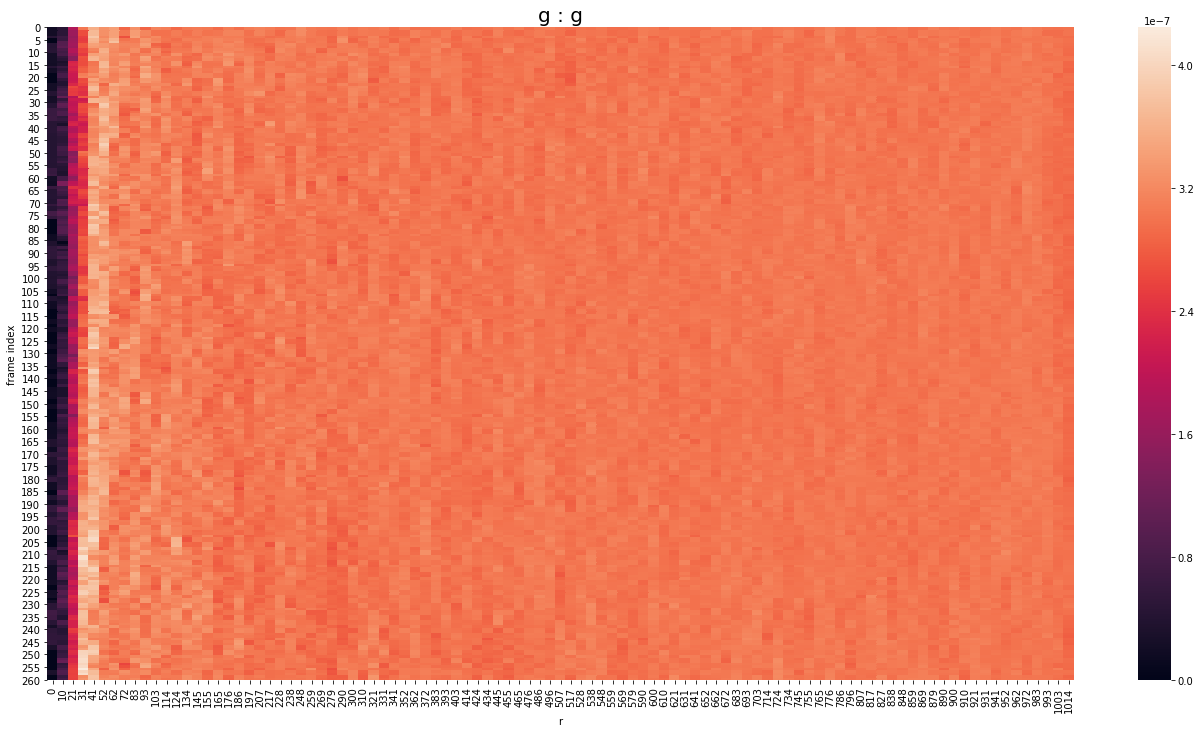

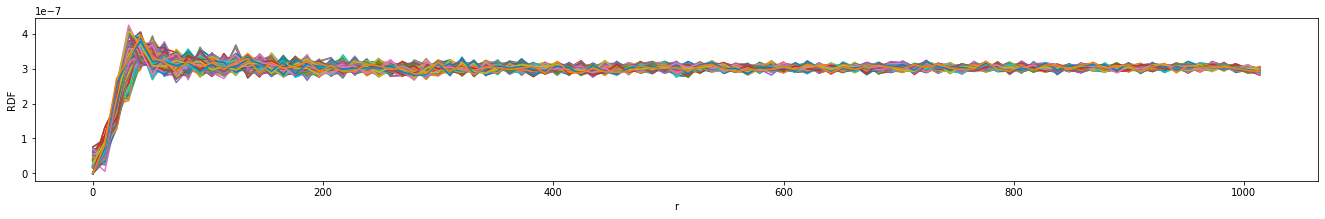

In [45]:
from flowermodel.plotting import plot_rdf_heatmap, plot_rdfs

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdf_file = '{:s}/blobs/{:s}.blob.rdf.color_{:s}{:s}.csv'.format(data_path, moviefile, color1, color2)
        plot_rdf_heatmap(rdf_file)
        plt.title('{:s} : {:s}'.format(color1, color2), size=20)
        # plt.figure()
        plot_rdfs(rdf_file)

# Scratch

In [17]:
import flowermodel.calculate_rdf as crdf 
data_path = '/projects/chuang-lab/jnh/flower/data'
rdfobj = crdf.vidrdf(data_path, moviefile)
rdfdf = rdfobj.get_rdf(color1, color2)

  1%|          | 3/262 [00:01<02:31,  1.71it/s]/projects/chuang-lab/jnh/flower/flowermodel/flowermodel/calculate_rdf.py:103: RuntimeWarning: invalid value encountered in long_scalars
  rdf = ((r1 <= self.dist) & (self.dist < r2)).sum()/ self.N/ a
100%|██████████| 262/262 [02:28<00:00,  1.76it/s]


In [24]:
frdfobj = crdf.framerdf(blobs, vid, 3, color1, color2)

/projects/chuang-lab/jnh/flower/flowermodel/flowermodel/calculate_rdf.py:103: RuntimeWarning: invalid value encountered in long_scalars
  rdf = ((r1 <= self.dist) & (self.dist < r2)).sum()/ self.N/ a


In [28]:
blobs[blobs['frame'] == 3]

,x,y,radius,color,frame


In [25]:
frdfobj.dist

array([], shape=(0, 0), dtype=float64)